# Telco Customer Churn

**BUILD MACHINE LEARNING MODEL**

This section's objective is to construct and pick the best model to forecast whether a customer would churn or not in order to aid in customer retention.

We will focusing on searching best model using some conditions below :


*   First, Split the data info 80% Train data and 20% Test data
*   Scale the data so that they're having the same scale
*   In this case, we will use 3 Machine Learning models as logistic regression, random forest classifier and KNearest Neighbors Model
*   We try to do the hyperparameter tuning then compare it between it's default models
*   And last, we compare the result between models to achieve our goals







**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

# SciPy library provides large number of statistical function
import scipy.stats as ss
from scipy.stats import anderson, chi2_contingency

plt.style.use('ggplot')

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.model_selection import learning_curve, ValidationCurve
from sklearn.model_selection import StratifiedKFold , cross_val_score
from sklearn import metrics

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

**Overview**

In [2]:
from google.colab import  files
uploaded = files.upload()

Saving Telco-Customer-Churn-Clean.csv to Telco-Customer-Churn-Clean.csv


In [3]:
data = pd.read_csv('Telco-Customer-Churn-Clean.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# See data description
data.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.265370
std,24.559481,30.090047,2266.794470,0.441561
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [7]:
data.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [8]:
pd.DataFrame({'dataFeatures': data.columns, 'dataType':data.dtypes, 
              'null': data.isna().sum() , 'unique':data.nunique(),
              'uniqueSample': [list(data[i].drop_duplicates().sample(2)) for i in data.columns]}).reset_index(drop=True)

,dataFeatures,dataType,null,unique,uniqueSample
0,customerID,object,0,7043,"[0174-QRVVY, 8595-SIZNC]"
1,gender,object,0,2,"[Female, Male]"
2,SeniorCitizen,object,0,2,"[No, Yes]"
3,Partner,object,0,2,"[No, Yes]"
4,Dependents,object,0,2,"[Yes, No]"
5,tenure,int64,0,73,"[51, 33]"
6,PhoneService,object,0,2,"[Yes, No]"
7,MultipleLines,object,0,3,"[Yes, No phone service]"
8,InternetService,object,0,3,"[No, DSL]"
9,OnlineSecurity,object,0,3,"[No internet service, No]"


**SCALING**

Scaling used to changing the range of values of datas. We do this so that our models are having better performance, as it can help features arrive in more digestible form for these algorithm. Many machine learning algorithm perfom better or converge faster when features are on a relatively similar scale.

To scale our datas, there some scaling methods we can choose according to the conditions :



*   Standar Scaler : This method removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values.
*   Min Max Scaler : This method rescales the data set such that all feature values are in the range of 0 to 1. However, this scaling is very sensitive to the presence of outliers.
*   Robust Scaler : Robust scaler centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.





First, we do goodness of fit test to our continous datas using anderson method 


In [9]:
def normal(data):

  stat = anderson(data)[0]
  cval = anderson (data)[1][2]
  if stat <= cval :
    print('NORMALLY Distributed for' + col + 'Variable')
  else :
    print('NOT NORMALLY Distributed for' + col + 'Variable')

In [10]:
data_con = data.loc[:, data.dtypes != np.object].drop('Churn', axis=1)

In [11]:
data_con.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [12]:
for col in data_con:
  normal(data_con[col])

NOT NORMALLY Distributed fortenureVariable
NOT NORMALLY Distributed forMonthlyChargesVariable
NOT NORMALLY Distributed forTotalChargesVariable


The Anderson result indicate that our data are not normally distributed. Let's visualize it using qqplot below

<Figure size 800x600 with 0 Axes>

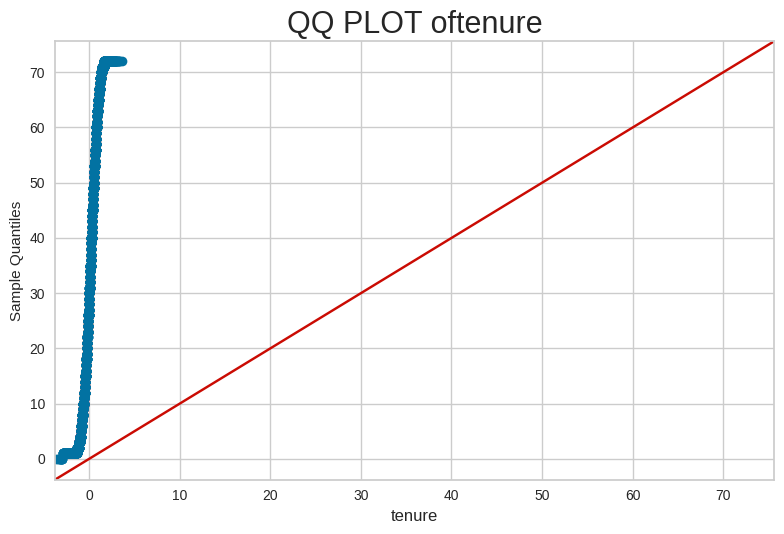

<Figure size 800x600 with 0 Axes>

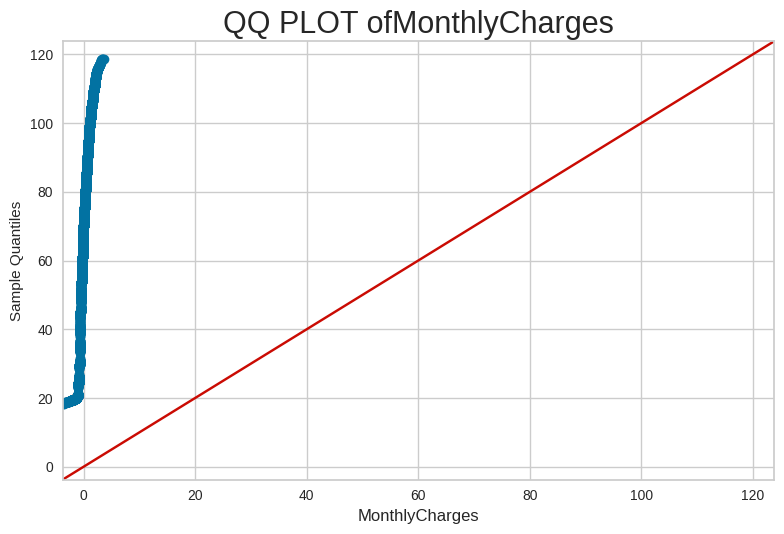

<Figure size 800x600 with 0 Axes>

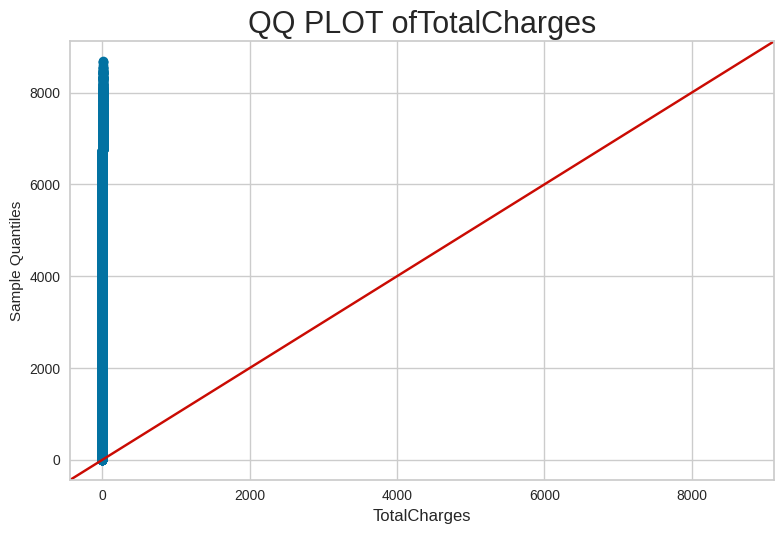

In [13]:
for col in data_con:
  plt.figure(figsize=(8,6))

  sm.qqplot(data[col], line='45')
  plt.xlabel(col, fontsize=12)
  plt.title('QQ PLOT of' + col, fontsize=22)

  plt.tight_layout()
  plt.show()

We can assume that it's not coming from a normal distribution, because the blue data points don't forming line that's roughly straight on red line. Therefore we're not choosing the Standard Scaler, as there are more method to choose from. Hence we are moving to next test.

I'd like to check whether our data are having many outliers or not, because if it is, we're going to choose the Robust Scaler method.

In [14]:
def outliers(data):
    Q2 = np.quantile(data, 0.50)
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    IQR   = (Q3 - Q1) * 1.5
    lower =  Q1 - IQR
    upper =  Q3 + IQR 

    outlier = ''
    for i in range(len(data)):
        if data[i] > upper :
            outlier = outlier + str(data[i]) + ', '
        if data[i] < lower :
            outlier = outlier + str(data[i]) + ', '
    return len(outlier)

In [15]:
for col in data_con:
    outlier = outliers(data[col])
    print('There are', outlier, 'Outliers on', col, 'Variable')

There are 0 Outliers on tenure Variable
There are 0 Outliers on MonthlyCharges Variable
There are 0 Outliers on TotalCharges Variable


Seems there are n outliers in our data, I'll try to visualize it below with boxplot. The boxplot are mainly used to display the distribution data

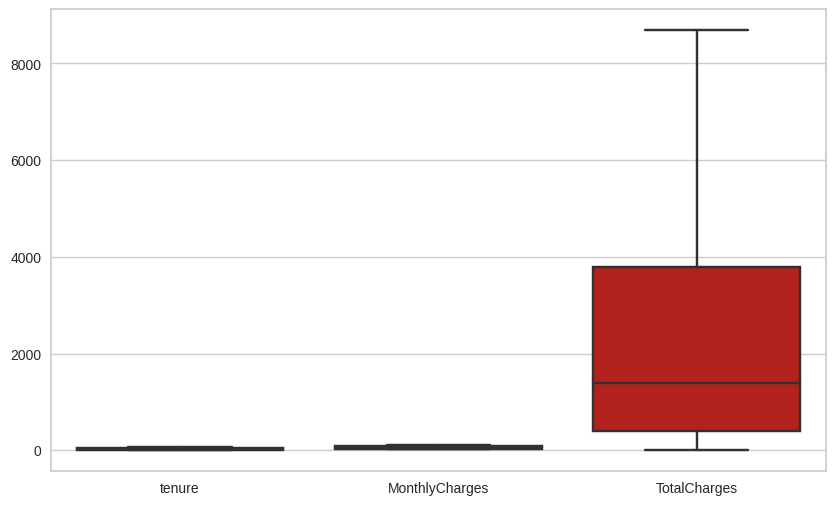

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data_con)
plt.show()

This proof our data doesn't have any outliers, so that using Robust Scaler is not necessary. We will scale using Min Max Scaler

In [17]:
data_scaled = data.copy()

In [18]:
# Using Min Max Scaler to scale the data

data_scaled['tenure'] = MinMaxScaler().fit_transform(data_scaled[['tenure']])
data_scaled['MonthlyCharges'] = MinMaxScaler().fit_transform(data_scaled[['MonthlyCharges']])
data_scaled['TotalCharges'] = MinMaxScaler().fit_transform(data_scaled[['TotalCharges']])

In [19]:
data_scaled.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437,0
1,5575-GNVDE,Male,No,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564,0
2,3668-QPYBK,Male,No,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453,1
3,7795-CFOCW,Male,No,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (),0.239303,0.211951,0
4,9237-HQITU,Female,No,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462,1


We already do the scaling. Let's try to visualize it using boxplot and see the difference between before and after scaling

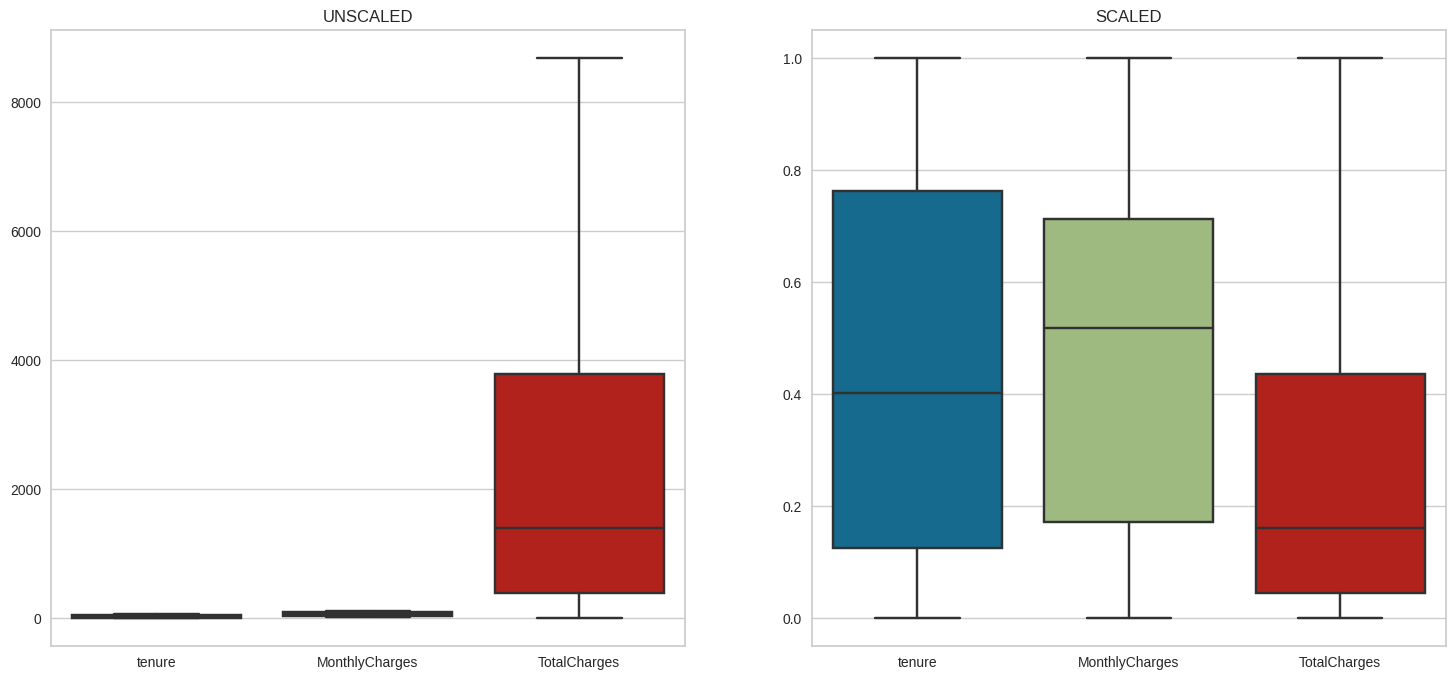

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

sns.boxplot(data=data_con, ax=ax1).title.set_text('UNSCALED')
sns.boxplot(data=data_scaled.drop(columns='Churn'), ax=ax2).title.set_text('SCALED')

plt.show()

Now we're ready to move on the prediction model building, but before that I'll create copy of our scaled, so that we're not getting mixed up in the process. I'd rather drop the CustomerID as it's just the same as index

In [25]:
data_ready = data_scaled.copy()

In [26]:
data_ready = data_ready.drop('customerID', axis=1)

Since all of this categorical data are numerical, I'll use pd.get_dummies to get our data labeled

In [27]:
data_ready = pd.get_dummies(data_ready, drop_first=True)

In [28]:
data_ready.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0.217564,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0.211951,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0.027778,0.521891,0.017462,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [29]:
data_ready.to_csv('Data_ready.csv', index=False)

Let's begin developing our practical models now that the scalling and labelling phase is complete. Our data will first be divided into 80% train data and 20% test data. To get the optimal tuning for each of our models, however, note that I changed the dataframe to a csv file above and passed it into the hyperparameter sections. 

**MODELLING**


**Split Train Data - 80%**

From this point forward we will be focusing on building our predictive model. I'll start this by splitting our data, then fitting and re-evaluatig the model by comparing each score with the hyperparameters score.

In [30]:
data_80 = data_ready.copy()

In [31]:
X = data_80.drop(columns=['Churn'])
y = data_80['Churn'].values

In [32]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


**FITTING MODEL**

In [33]:
# Split train data 80%, test data 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

#Model
LRG = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)

**HYPERPARAMETER**

Now we will set our Hyperparameter tuned model. A hyperparameter is a parameter whose value is used to control the machine learning process. Usually in most cases the model performed better by using this method. As mentioned, the tune process of hyperparameter will be on separate notebook. Below we apply the best tuned parameters to our hyperparameter versions of each model.


In [34]:
# applying model with hyperparameter
 
LRG_best = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10).fit(X_train, y_train)
RFC_best = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_depth=10).fit(X_train, y_train)
KNN_best = KNeighborsClassifier(p=1, n_neighbors=25, leaf_size=18).fit(X_train, y_train)

In [35]:
# train data

LRG_score_tr = LRG.score(X_train, y_train)
RFC_score_tr = RFC.score(X_train, y_train)
KNN_score_tr = KNN.score(X_train, y_train)
LRG_best_score_tr = LRG_best.score(X_train, y_train)
RFC_best_score_tr = RFC_best.score(X_train, y_train)
KNN_best_score_tr = KNN_best.score(X_train, y_train)

In [36]:
# test data
LRG_score = LRG.score(X_test, y_test)
RFC_score = RFC.score(X_test, y_test)
KNN_score = KNN.score(X_test, y_test)
LRG_best_score = LRG_best.score(X_test, y_test)
RFC_best_score = RFC_best.score(X_test, y_test)
KNN_best_score = KNN_best.score(X_test, y_test)


In [37]:
model80_train_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'],
'Normal': [LRG_score_tr, RFC_score_tr, KNN_score_tr],
'Hyper': [LRG_best_score_tr, RFC_best_score_tr, KNN_best_score_tr]})

In [38]:
model80_test_score = pd.DataFrame({'Model' : ['LogRegression', 'RandomForest', 'KNNeighbors'],
'Normal': [LRG_score, RFC_score, KNN_score],
'Hyper': [LRG_best_score, RFC_best_score, KNN_best_score]})

In [39]:
pd.concat([model80_train_score, model80_test_score], keys=['TrainScore', 'TestScore'])

Model    Normal     Hyper
TrainScore 0  LogRegression  0.801562  0.799610
           1   RandomForest  0.998580  0.842563
           2    KNNeighbors  0.838303  0.802449
TestScore  0  LogRegression  0.821859  0.819021
           1   RandomForest  0.795600  0.809794
           2    KNNeighbors  0.766501  0.804116

Given that our models did actually perform better when employing hyperparameters, as shown by the test score results, we will utilize a hyperparameter model for our prediction. But before that, we can detect that there may be some overfitting in our data, particularly for the Random Forest approach, by comparing our train and test scores. So before moving on to the next stage, I'll try to cross-validate it. Cross validation helps in detecting overfitting by providing a more reliable estimate of how well the model will perform on unseen data.


In [40]:
# Cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state= 0)
LRG_kfold = cross_val_score(LRG_best, X_train, y_train, cv=cv, scoring='accuracy')
RFC_kfold = cross_val_score(RFC_best, X_train, y_train, cv=cv, scoring='accuracy')
KNN_kfold = cross_val_score(KNN_best, X_train, y_train, cv=cv, scoring='accuracy')

pd.DataFrame({'LRG Kfold cross-val': LRG_kfold.tolist(), 'RFC Kfold cross-val': RFC_kfold.tolist(), 'KNN Kfold cross-val': KNN_kfold.tolist()})

,LRG Kfold cross-val,RFC Kfold cross-val,KNN Kfold cross-val
0,0.815603,0.822695,0.819149
1,0.792553,0.799645,0.787234
2,0.767730,0.789007,0.760638
3,0.812057,0.819149,0.803191
4,0.786856,0.776199,0.763766
5,0.802842,0.776199,0.776199
6,0.788632,0.809947,0.779751
7,0.834813,0.822380,0.815275
8,0.785080,0.793961,0.781528
9,0.793961,0.792185,0.770870


 all three models—Logistic Regression, Random Forest, and K-Nearest Neighbors—perform reasonably well on average, with similar average cross-validation scores. However, logistic regression and random forest exhibit slightly higher average scores compared to KNN. The models' performance consistency varies, with logistic regression and random forest demonstrating more stable performance across the folds compared to KNN, which shows some variability.

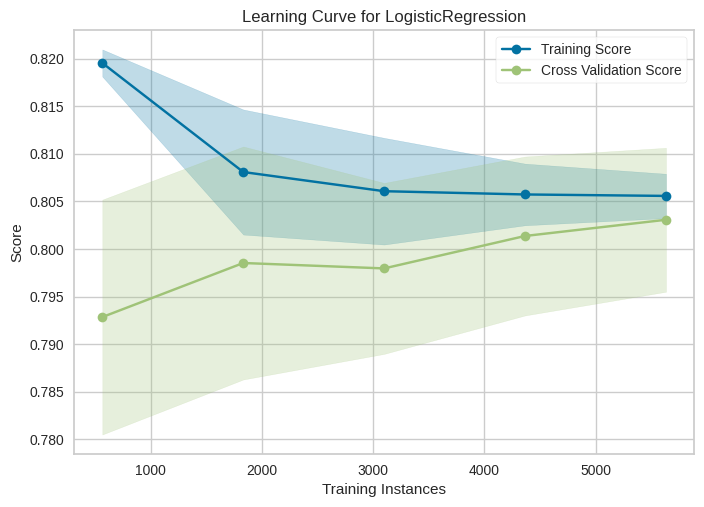

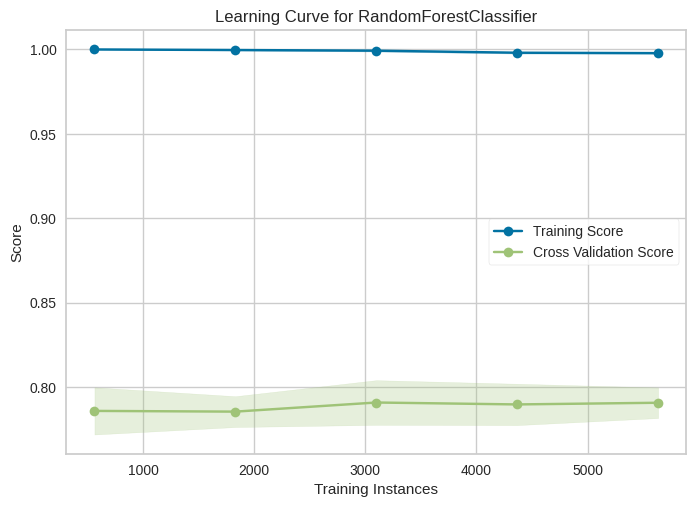

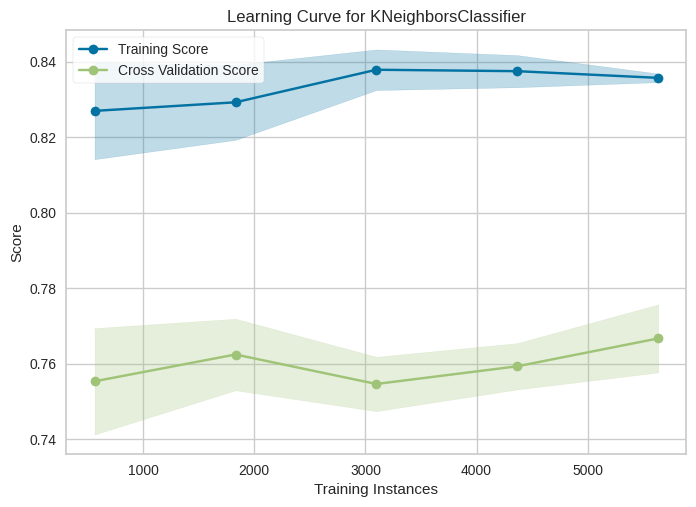

In [41]:
curve = [LRG, RFC, KNN]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

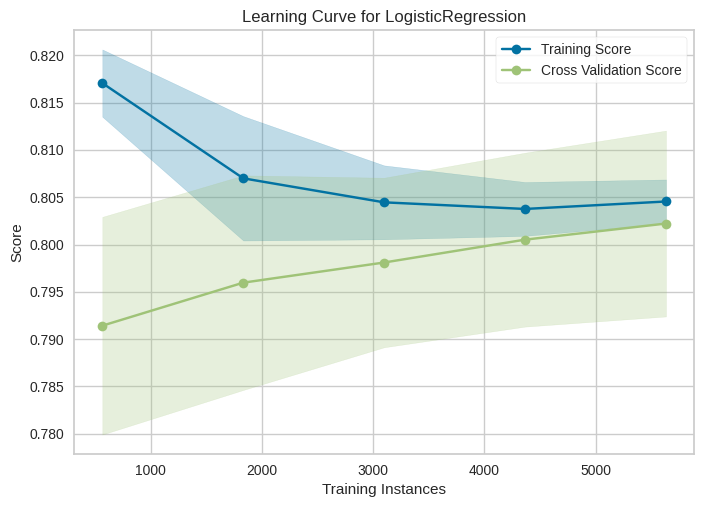

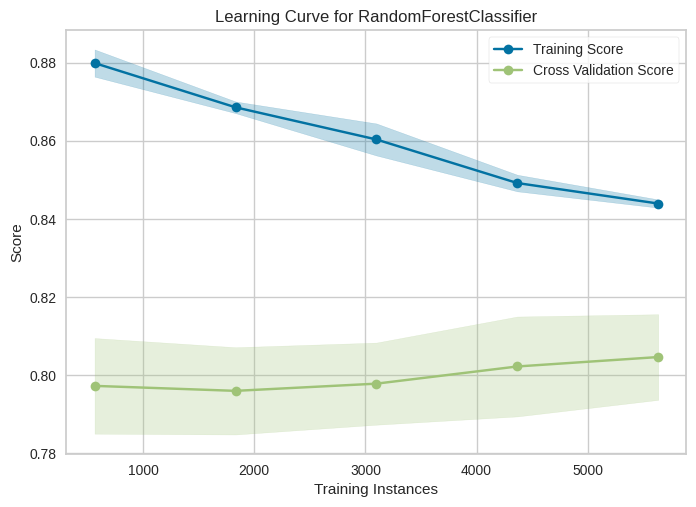

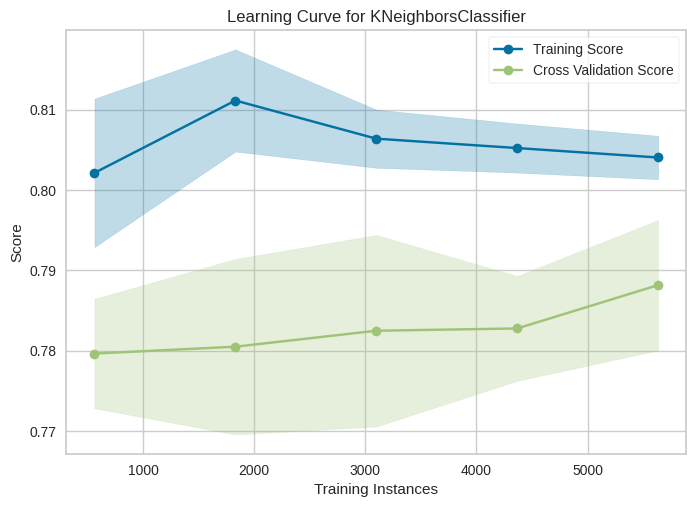

In [42]:
curve = [LRG_best, RFC_best, KNN_best]

for i in curve:
    learning_curve(i, X, y, scoring='accuracy')
    plt.show()

In [43]:
pd.DataFrame ({'Model': ['LogRegression', 'RandomForest', 'KNNeighbors' ], 
               'Normal': [LRG_score_tr, RFC_score_tr, KNN_score_tr],
               'Kfold': [LRG_kfold.mean(), RFC_kfold.mean(), KNN_kfold.mean()]})

,Model,Normal,Kfold
0,LogRegression,0.801562,0.798013
1,RandomForest,0.998580,0.800137
2,KNNeighbors,0.838303,0.785760


So, by using 5 times cross validation to compare our previous score with the kfold score, it seems that we can see overfitting on our Random Forest model, while the other two are rather stable. But for now let's continue to next process, we will apply our model to predict the test data.


**PREDICT**

In [44]:
# Logistic regression
yp_LRG = LRG_best.predict(X_test)

# Random Forest
yp_RFC = RFC_best.predict(X_test)

# KNNeighbors
yp_KNN = KNN_best.predict(X_test)


**Model Performance Evaluation**

We will begin evaluating our models starting from Logistic Regression, Random Forest and lastly KNN model

**Logistic Regression**

In theory, Logistic Regression method uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output.

In [45]:
# evaluation matrix for Logistics Regression
cm_LRG = confusion_matrix(y_test, yp_LRG)
cm_LRG

array([[935, 101],
       [154, 219]])

In [46]:
labels = ['Not Churn', 'Churn']

              precision    recall  f1-score   support

   Not Churn       0.86      0.90      0.88      1036
       Churn       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



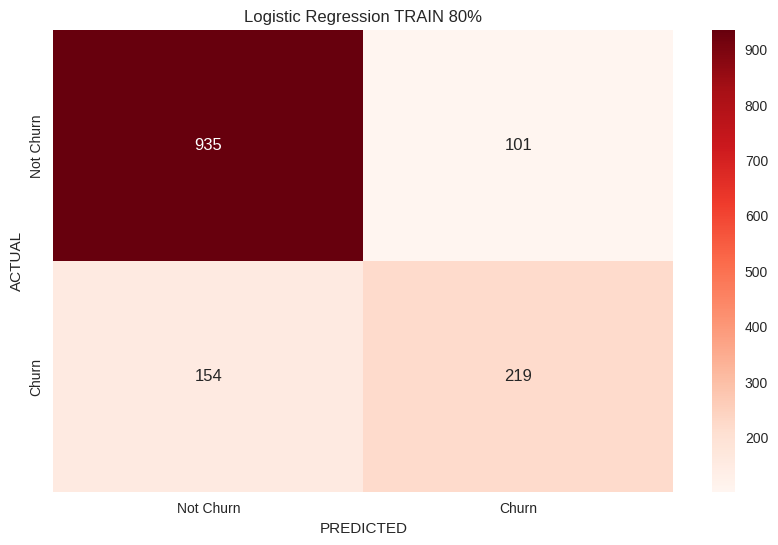

In [48]:
print(classification_report(y_test, yp_LRG, target_names= labels))
f, ax= plt.subplots(figsize=(10,6))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax, cmap='Reds')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

We can see that our data may very well be out of balance. We may therefore try to rebalance the data using an oversampling or undersampling strategy at the end, after comparing our results. It's a good result for the time being, so let's just concentrate on creating the models. I also added the classification report to report_LRG so that we could reference it again and concatenate it with other reports in the summary section.



In [49]:
report_LRG = pd.DataFrame(classification_report(y_test, yp_LRG, target_names=labels, output_dict=True)).T

**Random Forest Classifier**

It's essentially are a learning method for classifcation, regression, and other tasks that operate by constructing a multitude of Decision Trees. While decision tree is a based algorithm used to solve regression and classification problem. An inverted tree is framed which is branched off from a homogeneous prbability distributed root node, to highly heterogeneous leaf nodes, for deriving the output. Random Forest models are actually better performed with unscaled data, so maybe after we've done the process, we'do this model against the best model we later get in this Machine Learning section.

In [50]:
# confusion matrix for Random Forest Classifier

cm_RFC = confusion_matrix(y_test, yp_RFC)
cm_RFC

array([[954,  82],
       [186, 187]])

              precision    recall  f1-score   support

   Not Churn       0.84      0.92      0.88      1036
       Churn       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



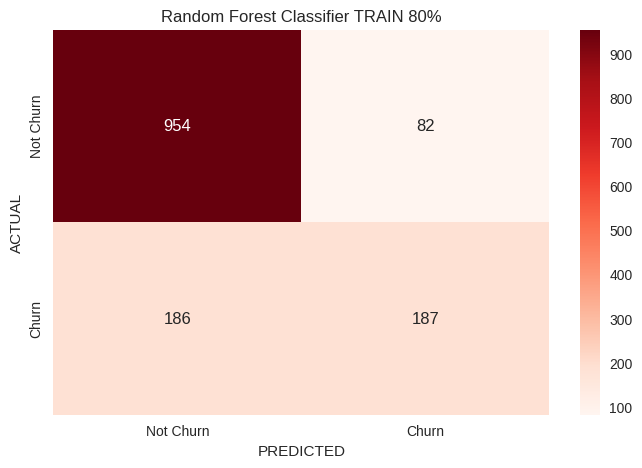

In [52]:
print(classification_report(y_test, yp_RFC, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC, annot=True, fmt=".0f", ax=ax, cmap = 'Reds')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [53]:
report_RFC = pd.DataFrame(classification_report(y_test, yp_RFC, target_names= labels, output_dict=True)).T

**K-Nearest Neighbors**

K-Nearest Neighbors is one of the most easy ML technique used. The logic behind KNN is to explore the data's nearest neighbor, assume the test datapoint to be similar to them and derive the output. In case of KNN classification, a majority voting is applied over the k nearest datapoints.

In [54]:
# confusion matrix for KNN
cm_KNN = confusion_matrix(y_test, yp_KNN)
cm_KNN

array([[914, 122],
       [154, 219]])

              precision    recall  f1-score   support

   Not Churn       0.86      0.88      0.87      1036
       Churn       0.64      0.59      0.61       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



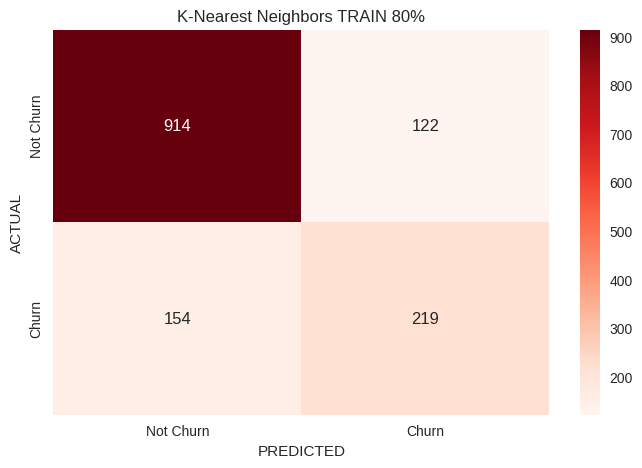

In [56]:
print(classification_report(y_test, yp_KNN, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_KNN, annot=True, fmt=".0f", ax=ax, cmap = 'Reds')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('K-Nearest Neighbors TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [57]:
report_KNN = pd.DataFrame(classification_report(y_test, yp_KNN, target_names= labels, output_dict=True)).T

**MODEL SUMMARY**

 A confusion matrix is simply a table that is often used to describe the performance of a classification model on a set of test data.

Let's now define the most basic terms in this matrix :


*   True Positives (TP): Cases in which are predicted as 
positives and in reality are also positives.
*   True Negatives (TN): Cases in which are predicted as negatives and in reality are also negatives.


*   False Positives (FP): Cases in which are predicted as positives, but in reality are negatives.
*   False Negatives (FN): Cases in which are predicted as negatives, but in reality are positives.

This is a list of rates that are often computed from a confusion matrix for a binary classifier:

*  Accuracy : Overall, how often is the classifier correct?
*  Recall : When it's actually true, how often does it predict as true ?
*  Precision : When it predicts true, how often is it correct ?

In [76]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
LRG_acc = accuracy_score(y_test, yp_LRG)
RFC_acc = accuracy_score(y_test, yp_RFC)
KNN_acc = accuracy_score(y_test, yp_KNN)

# precision
LRG_prec = precision_score(y_test, yp_LRG, pos_label = 1)
RFC_prec = precision_score(y_test, yp_RFC, pos_label = 1)
KNN_prec = precision_score(y_test, yp_KNN, pos_label = 1)

# recall
LRG_rec = recall_score(y_test, yp_LRG, pos_label = 1)
RFC_rec = recall_score(y_test, yp_RFC, pos_label = 1)
KNN1_rec = recall_score(y_test, yp_KNN, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y_test, yp_LRG, pos_label = 1)
RFC_fsc = f1_score(y_test, yp_RFC, pos_label = 1)
KNN_fsc = f1_score(y_test, yp_KNN, pos_label = 1)

In [77]:
final_score_comp = pd.DataFrame({'LRG' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc],
                                 'RFC' : [RFC_acc, RFC_prec, RFC_rec, RFC_fsc], 
                                 'KNN' : [KNN_acc, KNN_prec, KNN_rec, KNN_fsc]}, 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
final_score_comp

,LRG,RFC,KNN
ACCURACY,0.819021,0.809794,0.804116
PRECISION,0.684375,0.695167,0.642229
RECALL,0.587131,0.501340,0.587131
F1 SCORE,0.632035,0.582555,0.613445


**BEST MODEL SUMMARY**

Now that we've summarized all the models we need to predict, therefore in this next step, we will seek for our best model by comparing all the result from each models.

As the F1 score conveys the balance between the precision and the recall, thus rather than accuracy, we would pick the models with the highest F1 score from each of the categories.


In [78]:
model_best = pd.concat([report_LRG, report_RFC, report_KNN], keys = ['LRG', 'RFC', 'KNN'])


In [79]:
model_best

precision    recall  f1-score      support
LRG Not Churn      0.858586  0.902510  0.880000  1036.000000
    Churn          0.684375  0.587131  0.632035   373.000000
    accuracy       0.819021  0.819021  0.819021     0.819021
    macro avg      0.771480  0.744821  0.756017  1409.000000
    weighted avg   0.812468  0.819021  0.814357  1409.000000
RFC Not Churn      0.836842  0.920849  0.876838  1036.000000
    Churn          0.695167  0.501340  0.582555   373.000000
    accuracy       0.809794  0.809794  0.809794     0.809794
    macro avg      0.766005  0.711095  0.729696  1409.000000
    weighted avg   0.799337  0.809794  0.798933  1409.000000
KNN Not Churn      0.855805  0.882239  0.868821  1036.000000
    Churn          0.642229  0.587131  0.613445   373.000000
    accuracy       0.804116  0.804116  0.804116     0.804116
    macro avg      0.749017  0.734685  0.741133  1409.000000
    weighted avg   0.799266  0.804116  0.801216  1409.000000

Seeing the result, we can see that the Logistic Regression model is the best model out of three models.

<Axes: >

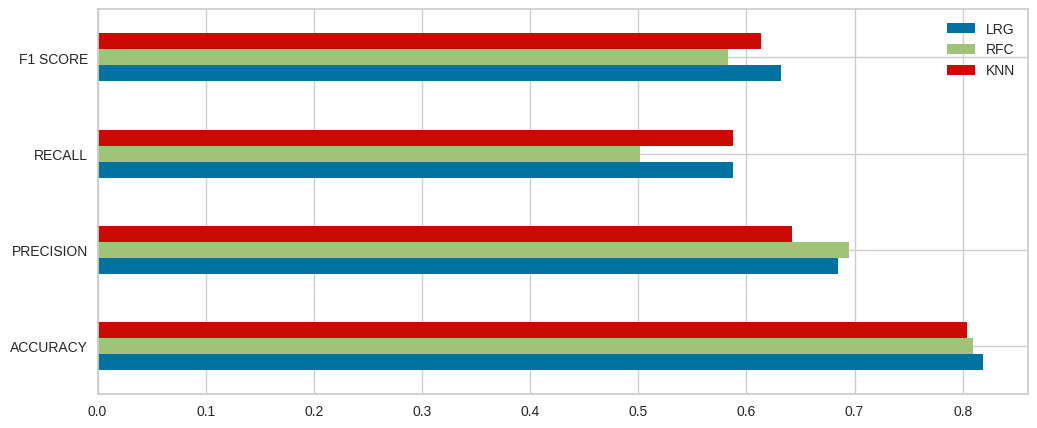

In [80]:
final_score_comp.plot(kind = 'barh', figsize = (12,5))

Finally we've finished this part, now we've got our three best models for our case. But out of all models, I think the best is using Logistic Regression as it is most stable, no overfitting in both categories.

So to summarize : This model have an Accuracy of 82%, correctly predict 68% of its total predictions on the churned customer and 86% on not churned customers. This model also having Recall of 59% on the churned customers, and 90% on not churned customers. I say that this is a good model, the best out of three.

              precision    recall  f1-score   support

   Not Churn       0.86      0.90      0.88      1036
       Churn       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



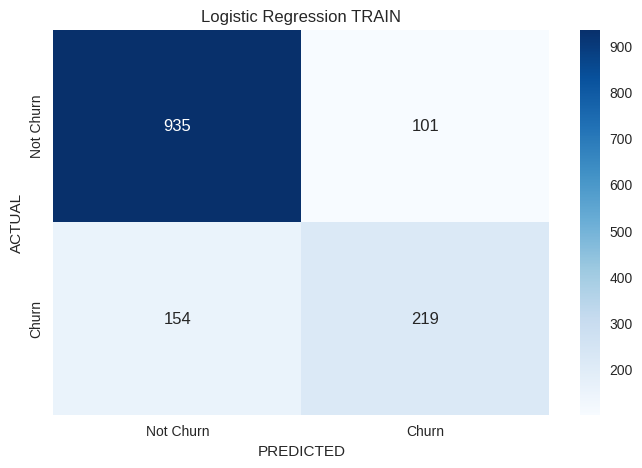

In [81]:
print(classification_report(y_test, yp_LRG, target_names = labels))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

Please take note that we are utilising all features for these models in this section. We will use these three models to make predictions in the following part while using feature selection to determine which features work best for our models. However, as I've already indicated, using unscaled data can occasionally improve the performance of Random Forest. So, at the very least, we'll check it to see what it is.


In [82]:
data_new = data.copy().drop(columns = ['customerID'])

In [83]:
data_new = pd.get_dummies(data_new, drop_first = True)

In [84]:
data_new.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


**NEW MODEL PREPARATION**

In [85]:
X2 = data_new.drop(columns=['Churn'])
y2 = data_new['Churn'].values

In [86]:
X2

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


**Fitting Model - Unscaled Data Random Forest**

In [87]:
# Split data

X2_train, X2_test, y2_train, y2_test =  train_test_split(X2, y2, train_size = 0.8, random_state = 42)

# Model

RFC2 = RandomForestClassifier().fit(X2_train, y2_train)

# Hyperparameter

RFC2_best = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 2, max_depth = 10).fit(X2_train, y2_train)

# train model score

RFC2_score_tr = RFC2.score(X2_train,y2_train)
RFC2_best_score_tr = RFC2_best.score(X2_train,y2_train)

# test model score

RFC2_score = RFC2.score(X2_test,y2_test)
RFC2_best_score = RFC2_best.score(X2_test,y2_test)

In [88]:
RF_train_score = pd.DataFrame({'Normal': [RFC2_score_tr],
                               'Hyper' : [RFC2_best_score_tr]})

RF_test_score = pd.DataFrame({'Normal': [RFC2_score],
                              'Hyper' : [RFC2_best_score]})

In [89]:
pd.concat([RF_train_score, RF_test_score], keys = ['RF Train Score', 'RF Test Score'])

,,Normal,Hyper
RF Train Score,0,0.99858,0.852503
RF Test Score,0,0.79560,0.810504


If we use the default parameter, we will still have overfitting even with unscaled data, but we can also see that the hyperparameter customized model does not exhibit overfitting, which is encouraging. To verify this, I'll attempt cross validation one again.

In [90]:

cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state=0)

RFC2_kfold = cross_val_score(RFC2_best, X2_train, y2_train, cv = cv, scoring = 'accuracy')

pd.DataFrame({'RFC Kfold cross-val' : RFC2_kfold.tolist()})

,RFC Kfold cross-val
0,0.806566
1,0.801242
2,0.779947
3,0.811890
4,0.789520


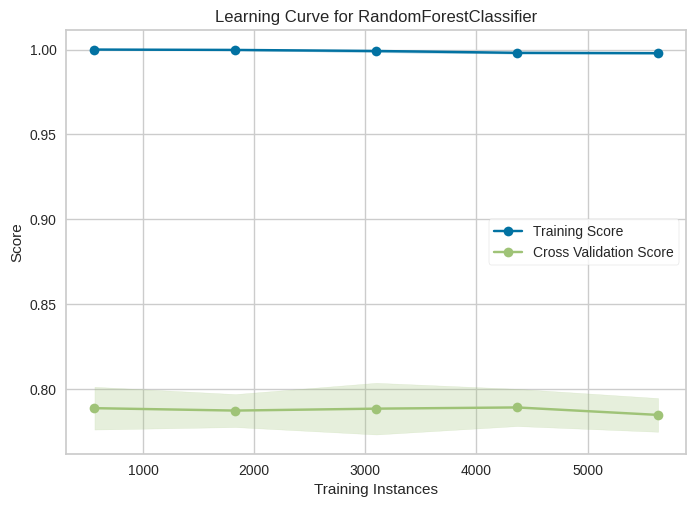

In [91]:
learning_curve(RFC2, X2, y2, scoring='accuracy')
plt.show()

The overfitting still exist on default parameter.

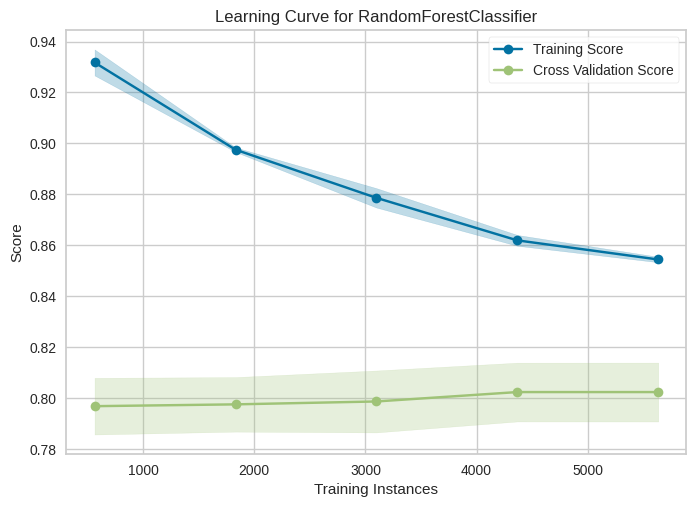

In [92]:
learning_curve(RFC2_best, X2, y2, scoring='accuracy')
plt.show()

Again, when using hyperparameter tuned model on Random Forest seems to be overfitting but still within tolerable amount. Therefore we'll use this tuned model.

In [93]:

# Predict

yp_RFC2 = RFC2_best.predict(X2_test)

# Classification Report

report_RFC2 = pd.DataFrame(classification_report(y2_test, yp_RFC2, target_names = labels, output_dict=True)).T

**MODEL EVALUATION - UNSCALED RANDOM FOREST**

              precision    recall  f1-score   support

   Not Churn       0.84      0.92      0.88      1036
       Churn       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



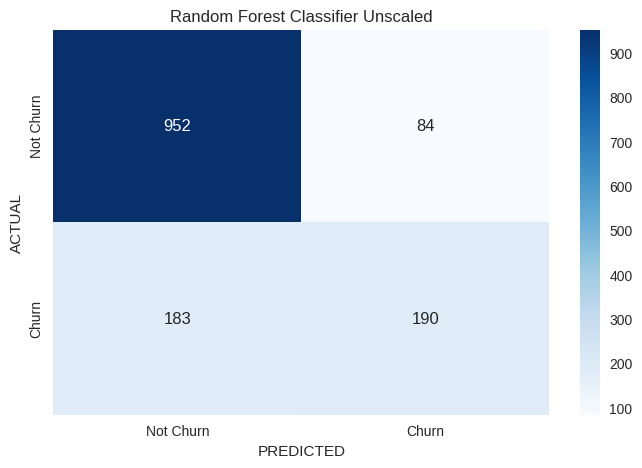

In [94]:
# confusion matrix for RandomForestClassifier

cm_RFC2 = confusion_matrix(y2_test, yp_RFC2)

print(classification_report(y2_test, yp_RFC2, target_names = labels))

# Plot confusion matrix

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_RFC2, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Random Forest Classifier Unscaled')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

**CONCLUSION FOR BEST MODEL**

Finally we'll get to see which model are the best to predict this data by comparing and evaluating unscaled Random Forest model vs Logistic Regression model, our best model from previous modelling.

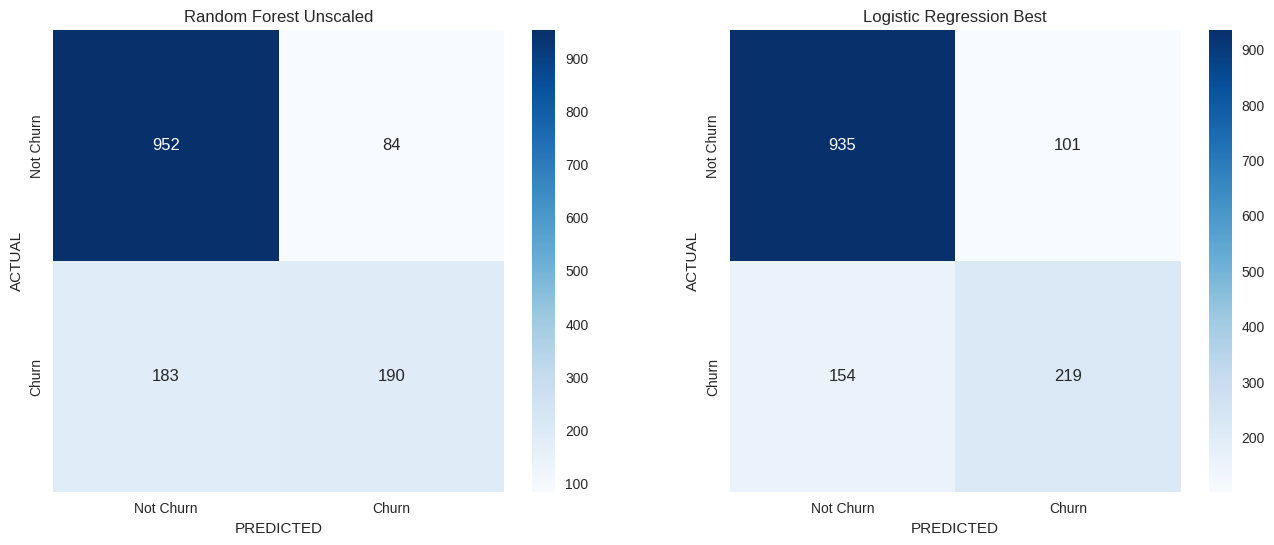

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(cm_RFC2, annot=True, fmt=".0f", ax=ax1, cmap='Blues')
sns.heatmap(cm_LRG, annot=True, fmt=".0f", ax=ax2, cmap = 'Blues')

ax1.xaxis.set_ticklabels(labels), ax1.yaxis.set_ticklabels(labels)
ax2.xaxis.set_ticklabels(labels), ax2.yaxis.set_ticklabels(labels)

ax1.set_title('Random Forest Unscaled'), ax2.set_title('Logistic Regression Best')
ax1.set_xlabel('PREDICTED'), ax2.set_xlabel('PREDICTED')
ax1.set_ylabel('ACTUAL'), ax2.set_ylabel('ACTUAL')

plt.show()

In [96]:
pd.concat([report_RFC2, report_LRG], keys = ['RFC UNSCALED', 'LRG BEST'])

precision    recall  f1-score      support
RFC UNSCALED Not Churn      0.838767  0.918919  0.877015  1036.000000
             Churn          0.693431  0.509383  0.587326   373.000000
             accuracy       0.810504  0.810504  0.810504     0.810504
             macro avg      0.766099  0.714151  0.732171  1409.000000
             weighted avg   0.800292  0.810504  0.800327  1409.000000
LRG BEST     Not Churn      0.858586  0.902510  0.880000  1036.000000
             Churn          0.684375  0.587131  0.632035   373.000000
             accuracy       0.819021  0.819021  0.819021     0.819021
             macro avg      0.771480  0.744821  0.756017  1409.000000
             weighted avg   0.812468  0.819021  0.814357  1409.000000

In [97]:
# Accuracy, Precision, Recall and F1 Score

# accuracy
LRG_acc = accuracy_score(y_test, yp_LRG)
RFC2_acc = accuracy_score(y2_test, yp_RFC2)

# precision
LRG_prec = precision_score(y_test, yp_LRG, pos_label = 1)
RFC2_prec = precision_score(y2_test, yp_RFC2, pos_label = 1)

# recall
LRG_rec = recall_score(y_test, yp_LRG, pos_label = 1)
RFC2_rec = recall_score(y2_test, yp_RFC2, pos_label = 1)

# f1 score
LRG_fsc = f1_score(y_test, yp_LRG, pos_label = 1)
RFC2_fsc = f1_score(y2_test, yp_RFC2, pos_label = 1)

In [98]:
RFC_vs_LRG = pd.DataFrame({'RFC UNSC' : [RFC2_acc, RFC2_prec, RFC2_rec, RFC2_fsc], 
                           'LRG BEST' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc]}, 
                          index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
RFC_vs_LRG

,RFC UNSC,LRG BEST
ACCURACY,0.810504,0.819021
PRECISION,0.693431,0.684375
RECALL,0.509383,0.587131
F1 SCORE,0.587326,0.632035


<Axes: >

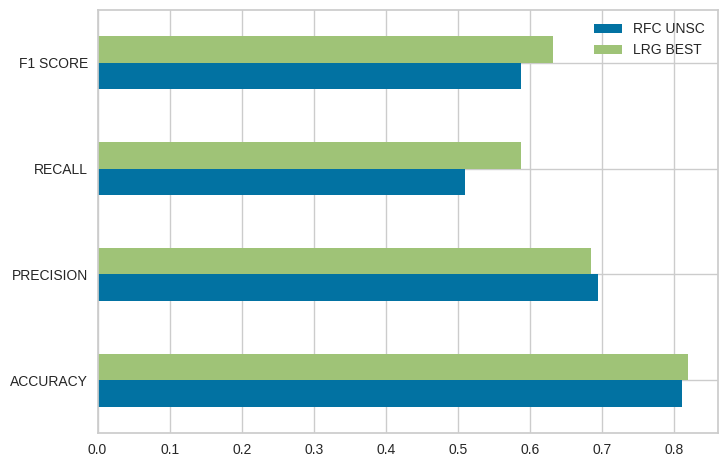

In [99]:
RFC_vs_LRG.plot(kind = 'barh')

Final results showed that the scaled data Logistic Regression model was still superior. Therefore, it is safe to claim that the optimum model for handling this data is logistic regression.